# Spotify Top Streamed Songs

![](https://www.imtest.de/wp-content/uploads/sites/7/2022/08/Aufmacher_Sportify.jpg?w=1200)
[Img Source](https://www.imtest.de/263893/news/spotify-neuer-home-screen-in-der-app/)

**This dataset contains information about songs and artists on a music streaming platform. It was webscraped and compiled to include the following metrics:**

**Position:** Spotify ranking of the song

**Artist Name:** Name of the artist

**Song Name:** Name of the song

**Days:** Number of days since the release of the song (updated)

**Top 10 (xTimes):** Number of times the song appeared in the top 10

**Peak Position:** Highest position the song reached

**Peak Position (xTimes):** Number of times the song reached its peak position

**Peak Streams:** Total number of streams during the peak position

**Total Streams:** Total number of streams for the song

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import csv

In [19]:
# Load the dataset
df = pd.read_csv('Spotify_final_dataset.csv')

In [20]:
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [21]:
# Shape of the dataset
df.shape

(11084, 9)

In [22]:
# Data types of the columns
df.dtypes

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)     object
Peak Streams                int64
Total Streams               int64
dtype: object

In [23]:
# Missing values
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

In [24]:
#Dropping Null Values
df = df.dropna(axis=0)
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

# EDA

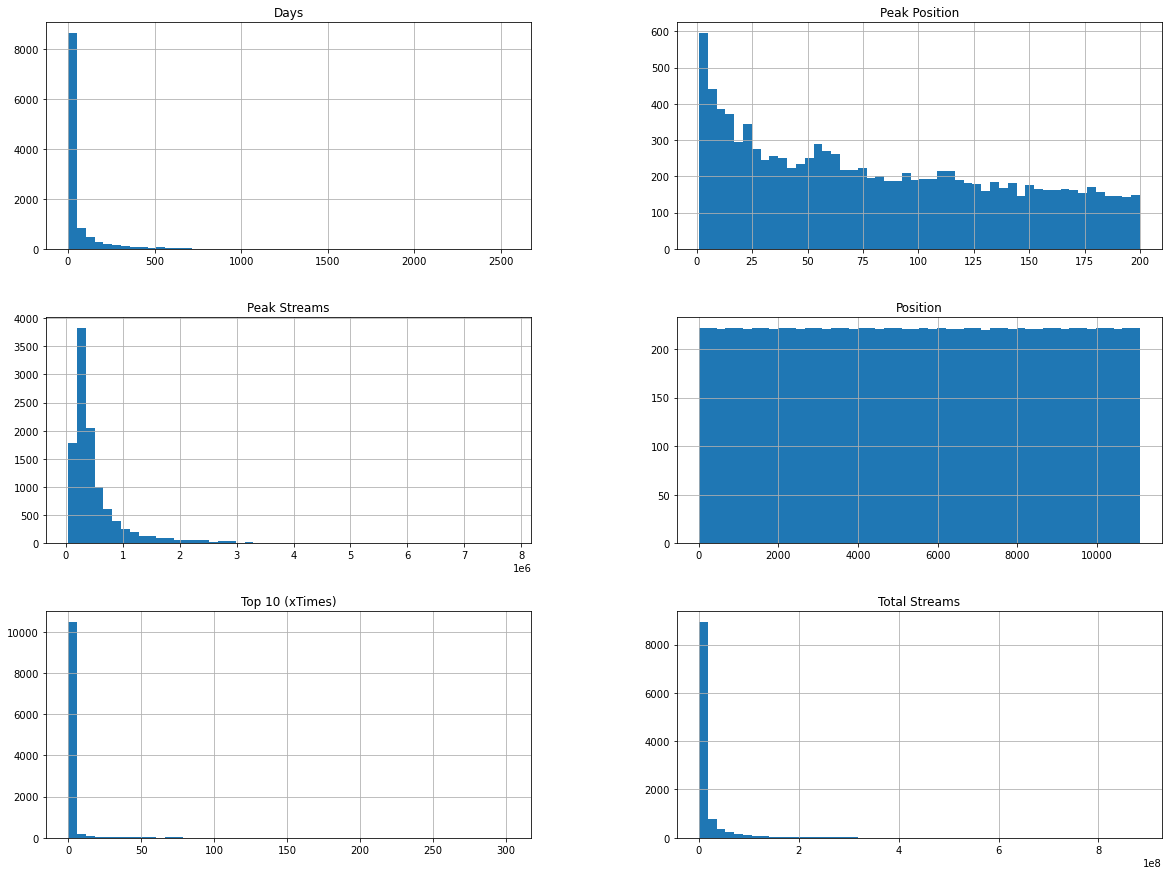

In [25]:
# Distribution of variables
df.hist(bins=50, figsize=(20,15))
plt.show()

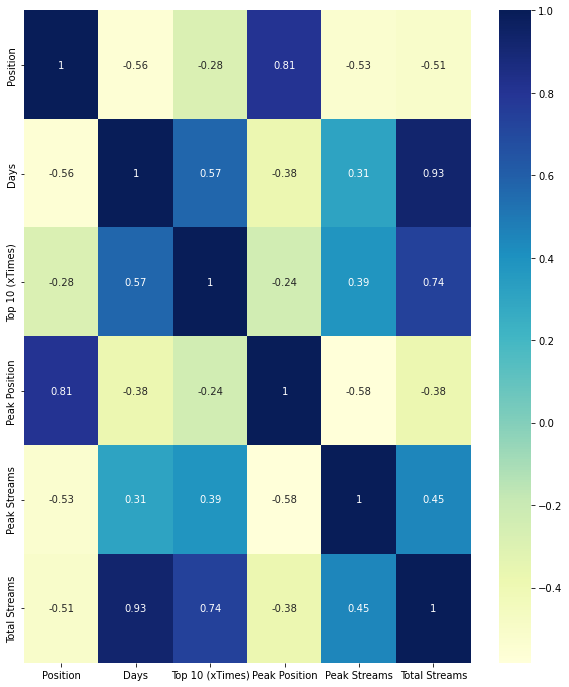

In [26]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [27]:
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

# Song Names VS Peak Position - Scatter Plot

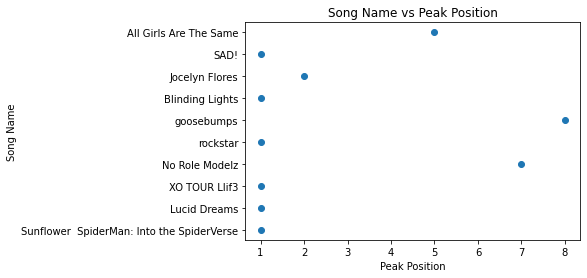

In [28]:
plt.scatter(df['Peak Position'].head(10), df['Song Name'].head(10))
plt.xlabel('Peak Position')
plt.ylabel('Song Name')
plt.title('Song Name vs Peak Position')
plt.show()

# Top 5 Songs With Highest Number of Streams

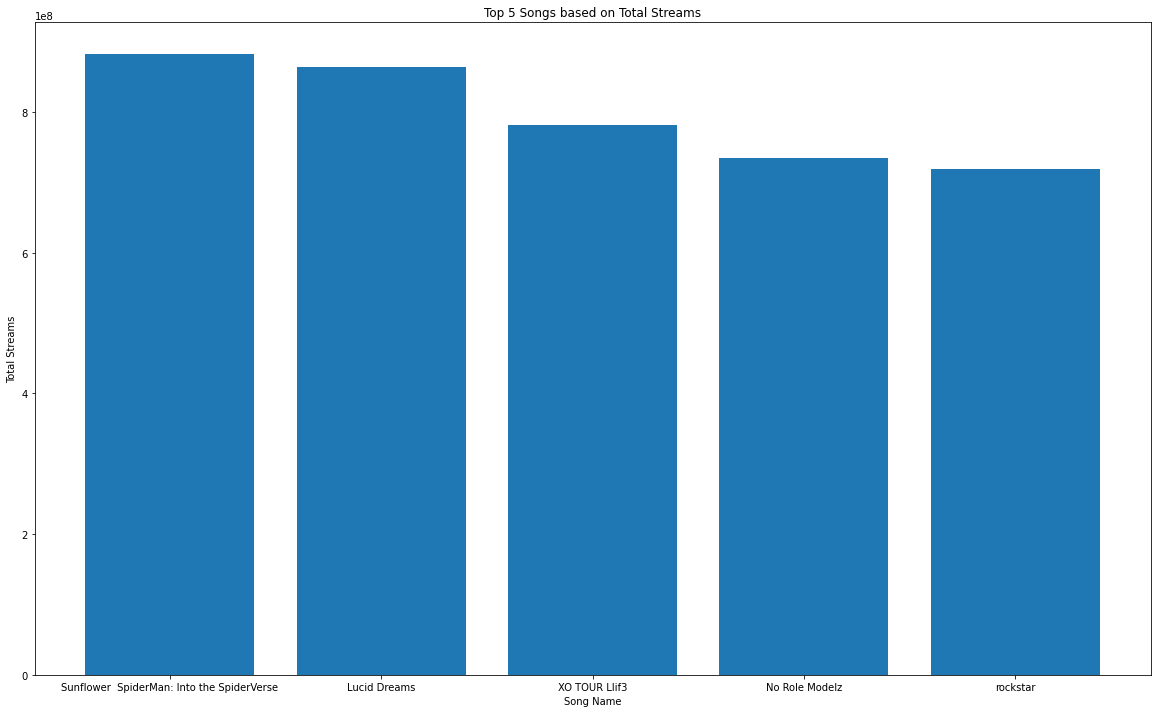

In [29]:
# Sort the songs by total streams in descending order
df.sort_values("Total Streams", ascending=False, inplace=True)

# Plot a bar graph to visualize the top songs based on streams
plt.figure(figsize=(20,12))
plt.bar(df["Song Name"][:5], df["Total Streams"][:5])

# Add labels and title to the graph
plt.xlabel("Song Name")
plt.ylabel("Total Streams")
plt.title("Top 5 Songs based on Total Streams")

# Show the plot
plt.show()

This code uses the pandas library to load the dataset into a dataframe and sort the songs based on the total streams. The matplotlib library is used to create a bar graph to visualize the top 5 songs based on the total streams. The xlabel, ylabel, and title functions are used to add labels and a title to the graph. Finally, the show function is used to display the plot.

# Bottom 5 Songs With Lowest Number of Streams

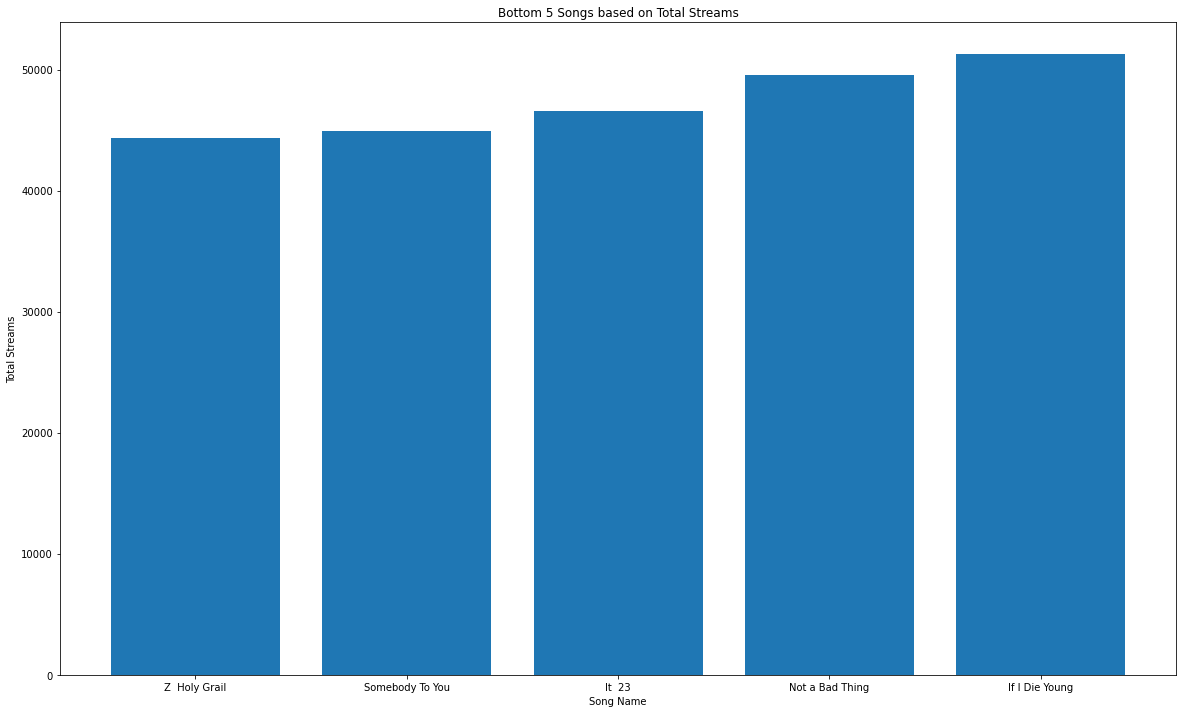

In [30]:
# Sort the songs by total streams in descending order
df.sort_values("Total Streams", ascending=True, inplace=True)

# Plot a bar graph to visualize the top songs based on streams
plt.figure(figsize=(20,12))
plt.bar(df["Song Name"][:5], df["Total Streams"][:5])

# Add labels and title to the graph
plt.xlabel("Song Name")
plt.ylabel("Total Streams")
plt.title("Bottom 5 Songs based on Total Streams")

# Show the plot
plt.show()

This code uses the pandas library to load the dataset into a dataframe and sort the songs based on the total streams. The matplotlib library is used to create a bar graph to visualize the bottom 5 songs based on the total streams. The xlabel, ylabel, and title functions are used to add labels and a title to the graph. Finally, the show function is used to display the plot.

# Top 10 Artists with most Hit songs

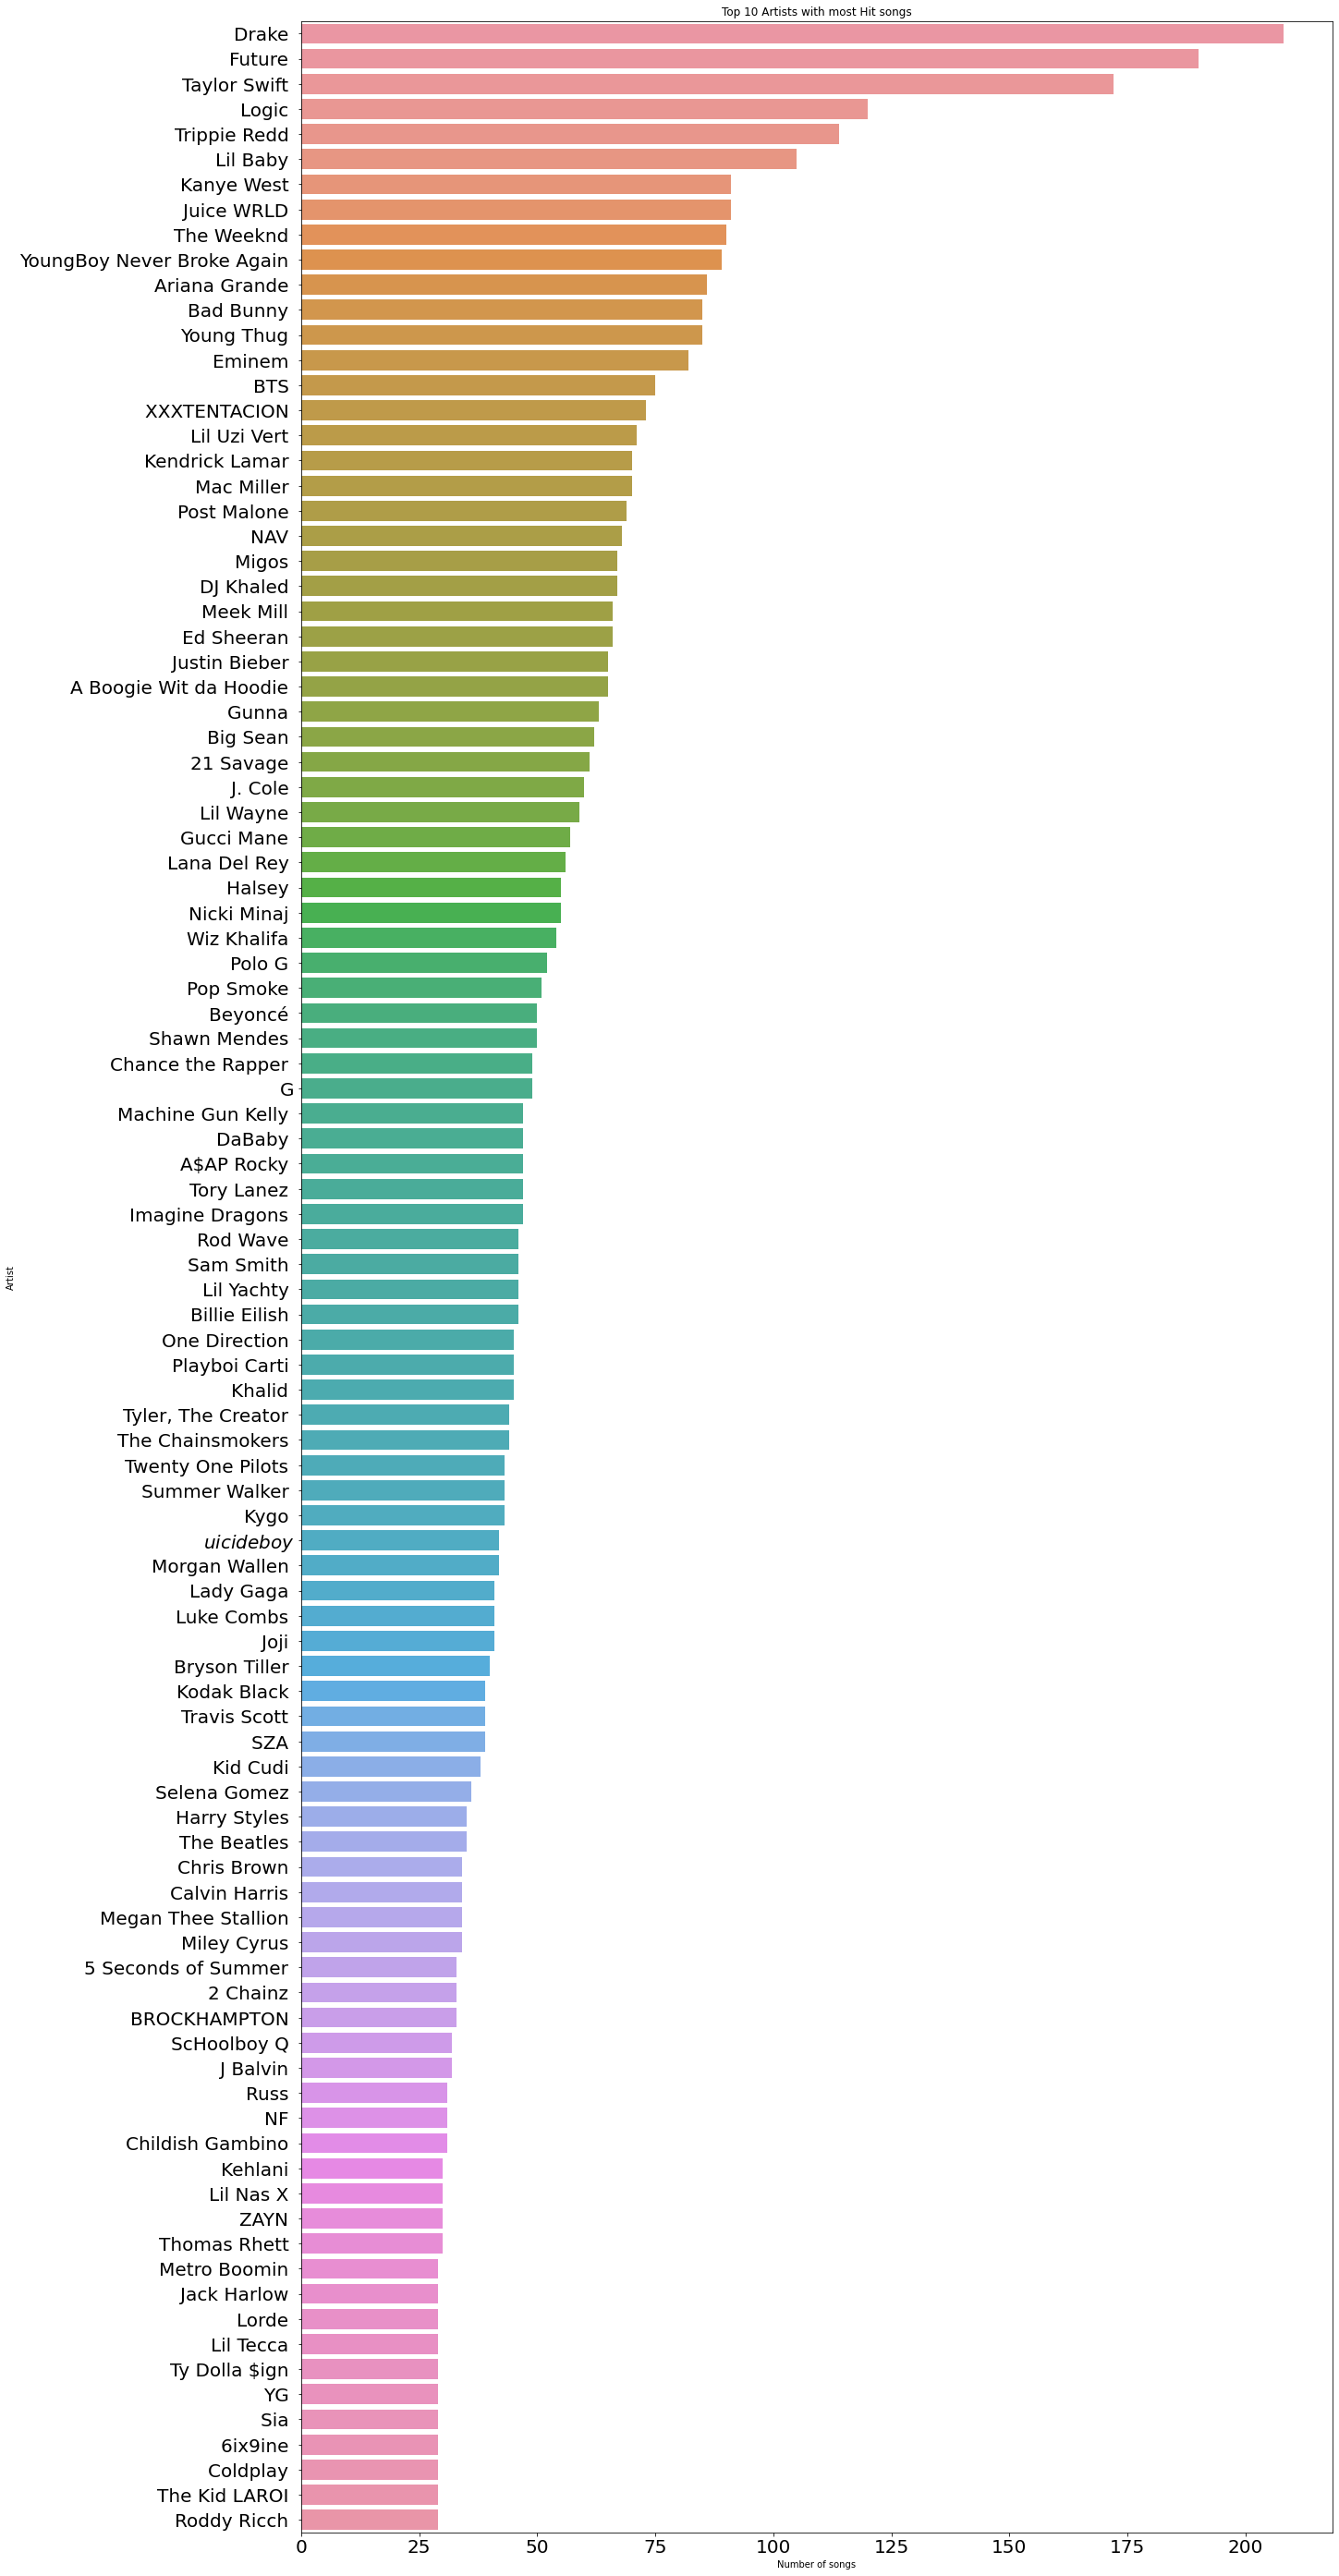

In [31]:
plt.figure(figsize=(20,50))
artists = df.groupby('Artist Name').size().sort_values(ascending=False)
topartists = artists.nlargest(100)
sns.barplot(y=topartists.index, x=topartists.values)
plt.title("Top 10 Artists with most Hit songs")
plt.ylabel("Artist")
plt.xlabel("Number of songs")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Plotly Visualizations

In [32]:
import plotly.express as px

In [33]:
# Create a line chart of the top songs based on streams over time
fig = px.line(df.sort_values("Total Streams", ascending=False)[:10], x="Days", y="Total Streams", color="Song Name")

fig.show()

In [34]:
# Create a scatter plot of the top songs based on peak position and peak streams
fig = px.scatter(df.sort_values("Peak Streams", ascending=False)[:10], x="Peak Position", y="Peak Streams", color="Song Name")

fig.show()


In [35]:
# Create a 3D scatter plot of the top songs based on position, days since release, and total streams
fig = px.scatter_3d(df.sort_values("Total Streams", ascending=False)[:10], x="Position", y="Days", z="Total Streams", color="Song Name")

fig.show()

In [36]:
# Create an interactive scatter plot of the top songs based on position and total streams
fig = px.scatter(df.sort_values("Total Streams", ascending=False)[:10], x='Position', y='Total Streams', color='Song Name', size='Total Streams',
           hover_name='Song Name', title='Top Songs by Total Streams')

fig.show()

In [37]:
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [38]:
# Create a 3D scatter plot of the top artists based on total streams
fig = px.scatter_3d(df.groupby("Artist Name").sum().sort_values("Total Streams", ascending=False)[:10], x='Peak Streams', y='Total Streams', z='Position',
              color='Position', size='Total Streams', opacity=0.7, title='Top Artists by Total Streams')
fig.show()


# Altair Visualizations

In [39]:
import altair as alt

In [40]:
# Create an interactive bar chart of the top songs based on total streams
chart = alt.Chart(df.sort_values("Total Streams", ascending=False)[:1000]).mark_bar().encode(
    x='Song Name:O',
    y='Total Streams:Q',
)

chart.interactive()

alt.Chart(...)

The alt.Chart function from the Altair library is used to create a bar chart of the data, and the mark_bar function is used to specify the type of chart to be created. The encode function is used to specify the x and y variables for the chart, and the interactive function is used to make the chart interactive.

# IPYWidgets Visualizations

In [41]:
import ipywidgets as widgets

In [42]:
# Create an interactive bar chart of the top songs based on total streams
def plot_top_songs(n):
    df2 = df.sort_values("Total Streams", ascending=False)[:n]
    return df2.plot.bar(x='Song Name', y='Total Streams', legend=False)

widgets.interact(plot_top_songs, n=widgets.IntSlider(min=1, max=20, step=1, value=10));

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

# Songs With Peak Position 1, Most Number of Times

In [43]:
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [44]:
df.iloc[:,6] = pd.to_numeric(df.iloc[:,6].str.extract(r'(\d+)', expand=False))

In [45]:
top_1 = df.nlargest(20, 'Peak Position (xTimes)')
top_1[['Artist Name', 'Song Name', 'Peak Position', 'Peak Position (xTimes)']]

,Artist Name,Song Name,Peak Position,Peak Position (xTimes)
4,Post Malone,rockstar,1,124
22,Drake,One Dance,1,103
18,Roddy Ricch,The Box,1,85
36,The Chainsmokers,Closer,1,70
17,Drake,God's Plan,1,70
10,Kendrick Lamar,HUMBLE.,1,67
139,Steve Lacy,Bad Habit,1,66
44,DaBaby,ROCKSTAR,1,65
79,Cardi B,WAP,1,64
194,Rihanna,Work,1,62


# Songs With Most Number of Top 10s

In [46]:
top_songs = df.nlargest(20, 'Top 10 (xTimes)')
top_songs[['Artist Name', 'Song Name', 'Peak Position', 'Top 10 (xTimes)']]

,Artist Name,Song Name,Peak Position,Top 10 (xTimes)
0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1,302.0
29,The Kid LAROI,Stay,1,271.0
45,Lil Nas X,INDUSTRY BABY,1,267.0
16,Glass Animals,Heat Waves,1,248.0
6,The Weeknd,Blinding Lights,1,233.0
2,Lil Uzi Vert,XO TOUR Llif3,1,212.0
51,Harry Styles,As It Was,1,203.0
18,Roddy Ricch,The Box,1,197.0
38,The Weeknd,The Hills,1,194.0
12,Travis Scott,SICKO MODE,1,190.0


# Distribution of Songs' Popularity

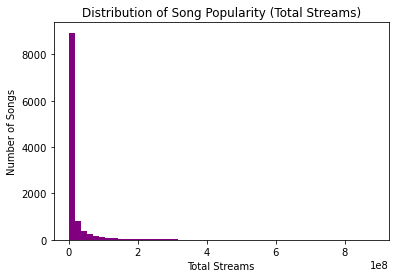

In [47]:
# Plot histogram of Total Streams
plt.hist(df['Total Streams'], bins=50, color='purple')

# Add labels and title
plt.xlabel("Total Streams")
plt.ylabel("Number of Songs")
plt.title("Distribution of Song Popularity (Total Streams)")

# Show plot
plt.show()

# Average Popularity of Songs per Artist

In [48]:
# Group the data by artist and calculate the mean of total streams
grouped = df.groupby("Artist Name").mean().reset_index()

# Plot the box plot of average total streams per artist
fig = px.box(grouped, x="Artist Name", y="Total Streams", points="all", title='Average Popularity of Songs per Artist')

fig.show()

# Clustering Through KMeans

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [50]:
# Group data by artist and sum total streams
grouped = df.groupby("Artist Name").sum()

In [51]:
# Create KMeans model with specified number of clusters
kmeans = KMeans(n_clusters=5)

In [52]:
# Fit the model to the data
kmeans.fit(grouped[["Total Streams"]])

KMeans(n_clusters=5)

In [53]:
# Get cluster labels
labels = kmeans.labels_

In [54]:
# Add cluster labels as a column to the grouped data
grouped["Cluster"] = labels

**Grouping Artists Based Upon Total Streams**

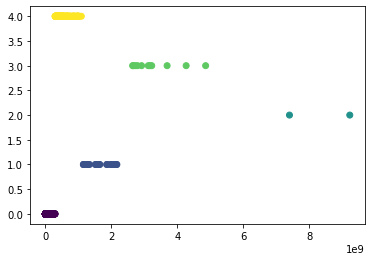

In [55]:
# Plot the data and color points based on cluster labels
plt.scatter(grouped["Total Streams"], grouped["Cluster"], c=grouped["Cluster"], cmap='viridis')
# Show the plot
plt.show()